In [2]:
from myutils import Datasets
import tensorflow as tf
from matplotlib import pyplot as plt
from myutils import Helpers 
import numpy as np
import os
from sklearn.decomposition import PCA
from myutils import Preprocessing as pp
from myutils import Datasets as ds
from myutils import Complexity_Measures as cm
import json
import seaborn as sns
 
import pandas as pd 




#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils

# Feature Importance

In [36]:
data = ds.get_preprocessed_datasets("RAW")["RAW"]["6,9"]
x_train = data["x_train"] /255

mean = np.mean(x_train, axis=0)

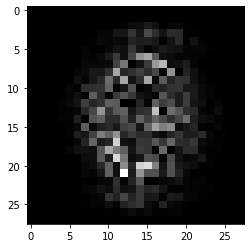

In [38]:
w = np.load("measure/featureimportance_pca/raw/6,9/weights.npy")
plt.imshow(abs(mean.reshape(784,1)*w).reshape(28,28),cmap="gray")

# Increasing Feature

In [130]:
l = list()
for preprocessing in os.listdir("measure/qcircuit_increasing"):
    for feautercount in os.listdir("measure/qcircuit_increasing/{}".format(preprocessing)):
        for subset in os.listdir("measure/qcircuit_increasing/{}/{}".format(preprocessing,feautercount)):
            if subset == "6,9" and preprocessing != "Autoencoder_layer8":
                hist = json.load(open("measure/qcircuit_increasing/{}/{}/{}/hist.json".format(preprocessing,feautercount,subset)))
                l.append({
                    "preprocessing":preprocessing,
                    "feautercount":int(feautercount),
                    "subset":subset,
                    "val_accuracy":hist["val_accuracy"][-1],
                })


hist = json.load(open("measure/qcircuit_loop/PCA/6,9/hist.json"))

l.append({
    "preprocessing":"PCA",
    "feautercount":4,
    "subset":"6,9",
    "val_accuracy":hist["val_accuracy"][-1],
})


hist = json.load(open("measure/qcircuit_loop/autoencoder_small/6,9/hist.json"))

l.append({
    "preprocessing":"Autoencoder",
    "feautercount":4,
    "subset":"6,9",
    "val_accuracy":hist["val_accuracy"][-1],
})



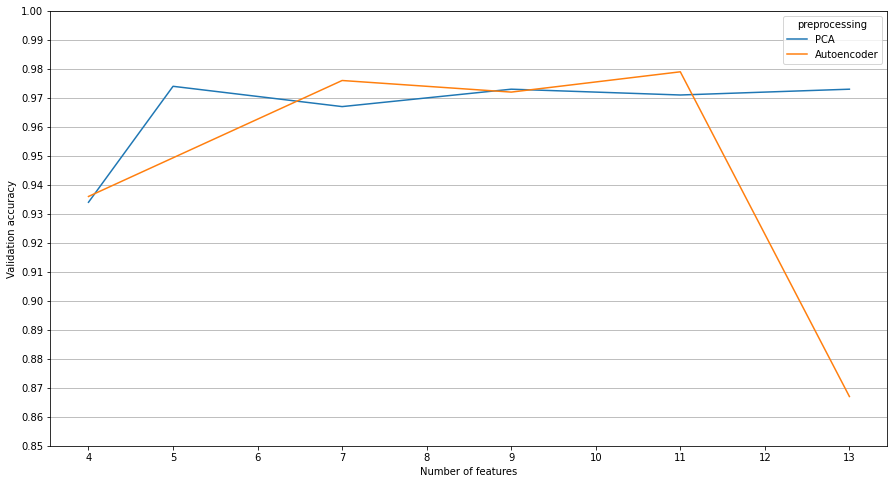

In [131]:
df = pd.DataFrame(l)
df.sort_values(by="feautercount",ascending=False,inplace=True)
plt.figure(figsize=(15,8))
plt.xticks(np.arange(4,14))
plt.ylim(0.86,1)
plt.yticks(np.arange(0.85,1,0.01))
sns.lineplot(x="feautercount",y="val_accuracy",hue="preprocessing",data=df)
plt.xlabel("Number of features")
plt.grid(axis="y")
plt.ylabel("Validation accuracy")
plt.savefig("plots/qcircuit_increasing.png", dpi=300, bbox_inches='tight')
plt.show()

# Increasing Feature with Bigger Circuit

In [116]:
l = list()
for preprocessing in os.listdir("measure/qcircuit_increasing"):
    for feautercount in os.listdir("measure/qcircuit_increasing/{}".format(preprocessing)):
        for subset in os.listdir("measure/qcircuit_increasing/{}/{}".format(preprocessing,feautercount)):
            if subset == "6,9":
                hist = json.load(open("measure/qcircuit_increasing/{}/{}/{}/hist.json".format(preprocessing,feautercount,subset)))
                l.append({
                    "preprocessing":preprocessing,
                    "feautercount":int(feautercount),
                    "subset":subset,
                    "val_accuracy":hist["val_accuracy"][-1],
                })


hist = json.load(open("measure/qcircuit_loop/PCA/6,9/hist.json"))

l.append({
    "preprocessing":"PCA",
    "feautercount":4,
    "subset":"6,9",
    "val_accuracy":hist["val_accuracy"][-1],
})


hist = json.load(open("measure/qcircuit_loop/autoencoder_small/6,9/hist.json"))

l.append({
    "preprocessing":"Autoencoder",
    "feautercount":4,
    "subset":"6,9",
    "val_accuracy":hist["val_accuracy"][-1],
})



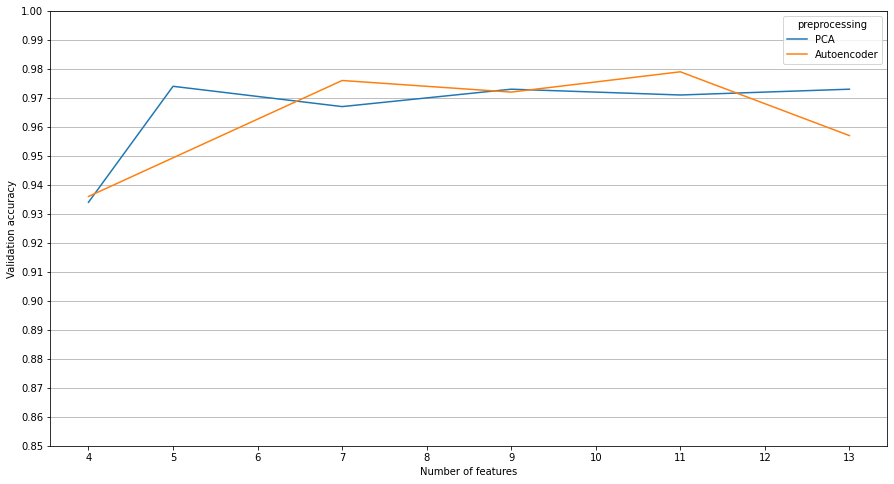

In [129]:
df = pd.DataFrame(l)
df = df.drop(df[(df.preprocessing == "Autoencoder") & (df.feautercount == 13)].index)

df.loc[df.preprocessing =="Autoencoder_layer8","preprocessing"] = "Autoencoder"

df.sort_values(by="feautercount",ascending=False,inplace=True)
plt.figure(figsize=(15,8))
plt.xticks(np.arange(4,14))
plt.ylim(0.86,1)
plt.yticks(np.arange(0.85,1,0.01))

sns.lineplot(x="feautercount",y="val_accuracy",hue="preprocessing",data=df)
plt.xlabel("Number of features")
plt.grid(axis="y")
plt.ylabel("Validation accuracy")
plt.savefig("plots/qcircuit_increasing_cont.png", dpi=300, bbox_inches='tight')
plt.show()

#  Binary Encoding

In [18]:
l = list()
for preprocessing in os.listdir("measure/qcircuit_loop"):
    if preprocessing in ["pca_x","PCA_binary","autoencoder_small","Autoencoder_binary"]:
        for subset in os.listdir("measure/qcircuit_loop/PCA_binary"):
            hist = json.load(open("measure/qcircuit_loop/{}/{}/hist.json".format(preprocessing,subset)))

            l.append({
                "preprocessing":preprocessing, 
                "subset":subset,
                "hist":hist["val_accuracy"],
                "epochs":np.arange(1,len(hist["val_accuracy"])+1)
                })

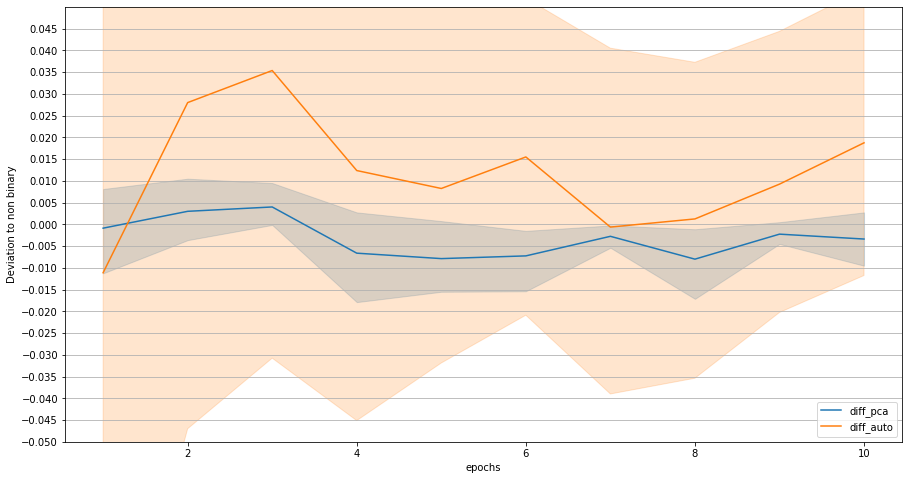

In [87]:
df = pd.DataFrame(l).explode(["hist","epochs"]).reset_index()
df = df.pivot_table(index=["subset","epochs"],columns=["preprocessing"],values="hist").reset_index()
df["diff_auto"] = df["Autoencoder_binary"]-df["autoencoder_small"]
df["diff_pca"] = df["PCA_binary"]-df["pca_x"]

#melt
df = df.melt(id_vars=["subset","epochs"],value_vars=["diff_auto","diff_pca"])


plt.figure(figsize=(15,8))
sns.lineplot(x="epochs",y="value",hue="preprocessing",data=df, hue_order=["diff_pca","diff_auto"])
plt.grid(axis="y")
plt.ylim(-0.05,0.05)
plt.yticks(np.arange(-0.05,0.05,0.005))
plt.ylabel("Deviation to non binary")
plt.legend(loc=4)
plt.savefig("plots/binary.png", dpi=300, bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='epochs', ylabel='hist'>

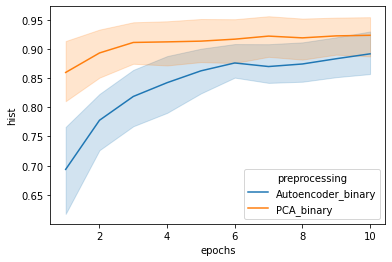

In [86]:
df = pd.DataFrame(l).explode(["hist","epochs"]).reset_index()
df = df[df.preprocessing.isin(["Autoencoder_binary","PCA_binary"])]
sns.lineplot(x="epochs",y="hist",hue="preprocessing",data=df)

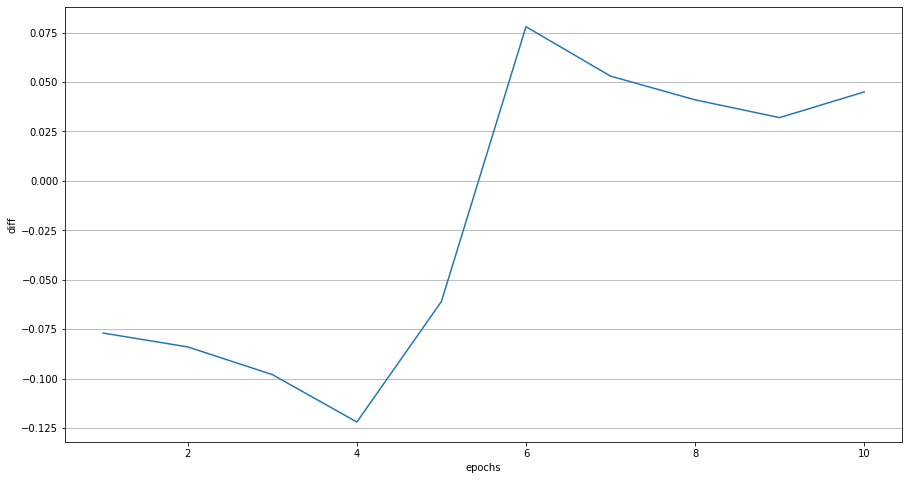

In [62]:
df = pd.DataFrame(l).explode(["hist","epochs"]).reset_index()
df = df[df.subset.isin(["2,6"])]
#pivot on proprocessing
df = df.pivot_table(index=["subset","epochs"],columns=["preprocessing"],values="hist").reset_index()
df["diff"] = df["Autoencoder_binary"]-df["autoencoder_small"]

plt.figure(figsize=(15,8))
sns.lineplot(x="epochs",y="diff",data=df)
plt.grid(axis="y")
plt.show()

In [241]:
data = ds.get_preprocessed_datasets("Autoencoder_small")["Autoencoder_small"]["7,9"]

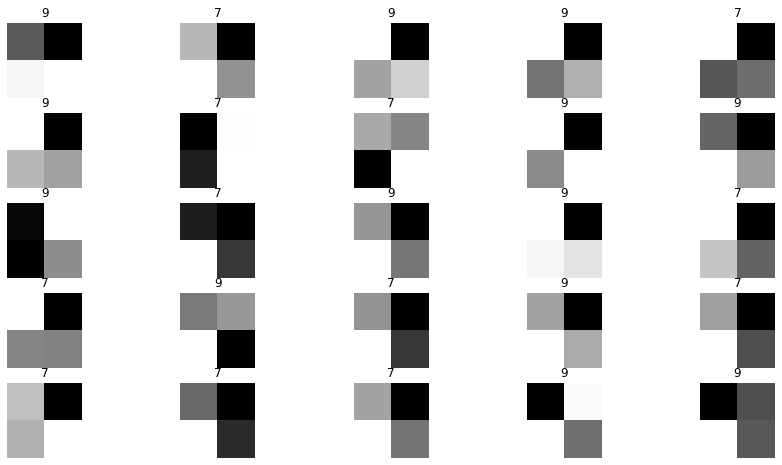

In [242]:
Helpers.plot_grid(data["x_train"],data["y_train"],rows=5,cols=5)

# Best Epoch Count for Auto Encoder

In [5]:
l = list()
for subset in os.listdir("data/Autoencoder_small"):
    hist = json.load(open("data/Autoencoder_small/"+subset+"/hist.json"))
   

    l.append({
        "subset": subset,
        "loss": hist["loss"],
        "epoch": np.arange(1,len(hist["loss"])+1)
    })

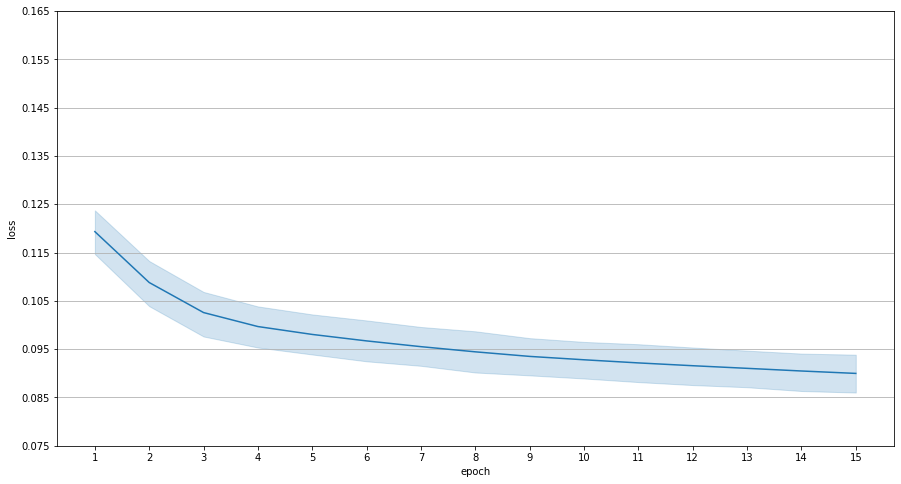

In [6]:
df = pd.DataFrame(l).explode(["loss","epoch"]).reset_index()

df.sort_values("epoch", inplace=True)


#plot mean and std as width of line
plt.figure(figsize=(15,8))
sns.lineplot(x="epoch", y="loss", data=df)
plt.xticks(np.arange(1, df["epoch"].max()+1, step=1))
plt.grid(axis="y")
plt.yticks(np.arange(0.075,0.175,step=0.01))
plt.savefig("plots/Autoencoder_HowmanyEpochs.png", dpi=300, bbox_inches="tight")

# Varying Difficulty among the subsets

In [204]:
l = list()

for preprocessing in os.listdir("measure/preprocessingvergleich"):
    for subset in os.listdir("measure/preprocessingvergleich/{}".format(preprocessing)):
        for round in os.listdir("measure/preprocessingvergleich/{}/{}".format(preprocessing,subset)):
            hist = json.load(open("measure/preprocessingvergleich/{}/{}/{}/hist.json".format(preprocessing,subset, round)))

            l.append({
                "preprocessing": preprocessing,
                "system":"neuralnetwork",
                "subset": subset,
                "round": round,
                "val_accuracy": hist["val_accuracy"],
                "epoch": np.arange(1,len(hist["val_accuracy"])+1)
            })



for preprocessing in os.listdir("measure/qcircuit_loop"):
    for subset in os.listdir("measure/qcircuit_loop/{}".format(preprocessing)):
        hist = json.load(open("measure/qcircuit_loop/{}/{}/hist.json".format(preprocessing,subset)))
        if preprocessing in ["pca_x","autoencoder_small"]:
            l.append({
                "system" : "qcircuit",
                "preprocessing": "qcircuit_{}".format(preprocessing),
                "subset": subset,
                "round": "0",
                "val_accuracy": hist["val_accuracy"],
                "epoch": np.arange(1,len(hist["val_accuracy"])+1)
            })


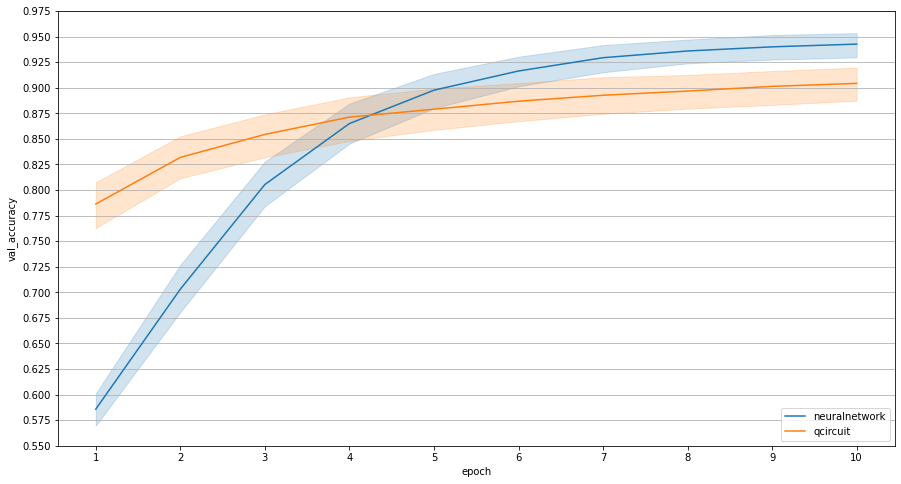

In [210]:
df = pd.DataFrame(l).explode(["val_accuracy","epoch"]).reset_index()
df = df.groupby(["preprocessing","system","subset","epoch"])["val_accuracy"].mean().reset_index()
df = df[df.preprocessing.isin(["PCA","Autoencoder_small","qcircuit_pca_x","qcircuit_autoencoder_small"])]
plt.figure(figsize=(15,8))
sns.lineplot(x="epoch", y="val_accuracy", hue="system", data=df)
plt.grid(axis="y")
plt.xticks(np.arange(1, df["epoch"].max()+1, step=1))
plt.yticks(np.arange(0.55,0.99,step=0.025))
plt.legend(loc=4)
plt.savefig("plots/systemvergleich.png", dpi=300, bbox_inches="tight")
plt.show()


In [189]:
df.groupby("system")["val_accuracy"].mean()

system
neuralnetwork    0.852062
qcircuit         0.870408
Name: val_accuracy, dtype: float64

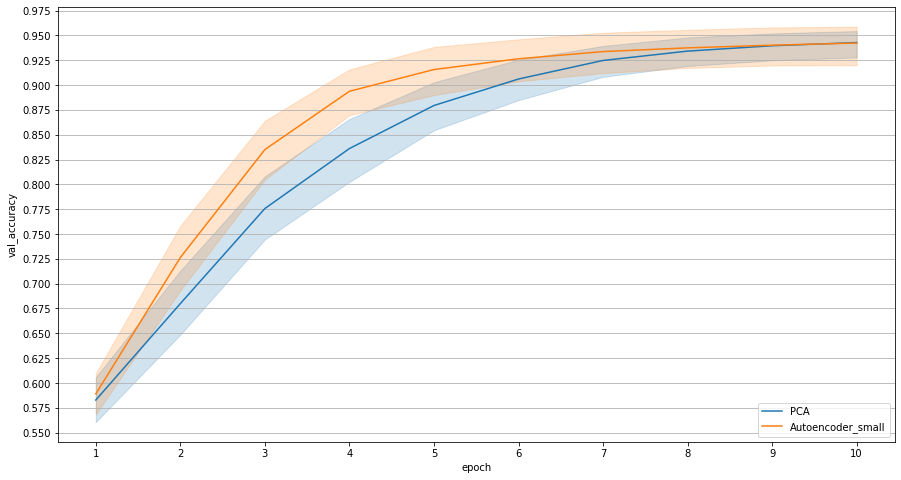

In [212]:
df = pd.DataFrame(l).explode(["val_accuracy","epoch"]).reset_index()
df = df.groupby(["preprocessing","system","subset","epoch"])["val_accuracy"].mean().reset_index()
df = df[df.system == "neuralnetwork"]
df = df[df.preprocessing.isin(["PCA","Autoencoder_small","qcircuit_pca_x","qcircuit_autoencoder_small"])]
plt.figure(figsize=(15,8))
sns.lineplot(x="epoch", y="val_accuracy", hue="preprocessing", data=df, hue_order=["PCA","Autoencoder_small"])
plt.grid(axis="y")
plt.xticks(np.arange(1, df["epoch"].max()+1, step=1))
plt.yticks(np.arange(0.55,0.99,step=0.025))
plt.legend(loc=4)
plt.savefig("plots/neural_network_preprocessing.png", dpi=300, bbox_inches="tight")
plt.show()


# PCA vs Autoencoder - Trainingsverhalten

In [145]:
for preprocessing in os.listdir("measure/qcircuit_loop"):
    for subset in os.listdir("measure/qcircuit_loop/{}".format(preprocessing)):
        hist = json.load(open("measure/qcircuit_loop/{}/{}/hist.json".format(preprocessing,subset)))
        if preprocessing in ["pca_x","autoencoder_small"]:
            l.append({
                "system" : "qcircuit",
                "preprocessing": "qcircuit_{}".format(preprocessing),
                "subset": subset,
                "round": "0",
                "val_accuracy": hist["val_accuracy"],
                "epoch": np.arange(1,len(hist["val_accuracy"])+1)
            })

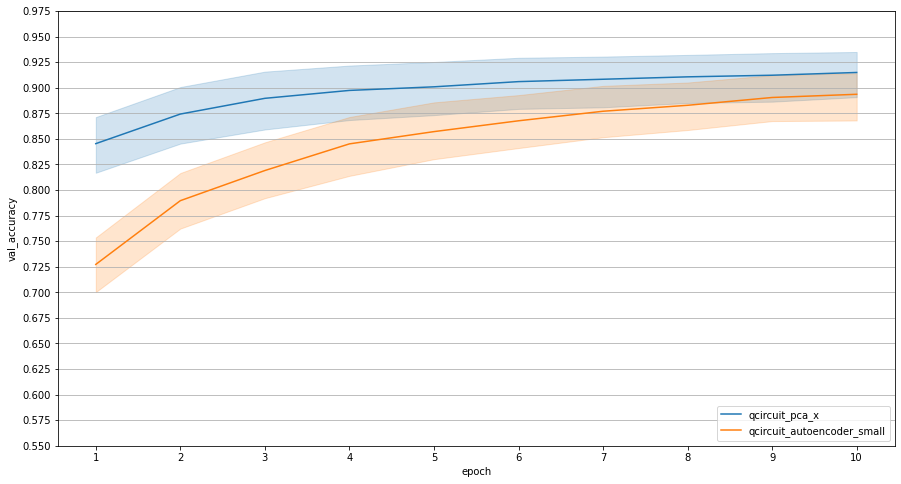

In [186]:
df = pd.DataFrame(l).explode(["val_accuracy","epoch"]).reset_index()
df = df.groupby(["preprocessing","subset","epoch"])["val_accuracy"].mean().reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(x="epoch", y="val_accuracy", hue="preprocessing",hue_order=["qcircuit_pca_x","qcircuit_autoencoder_small"], data=df)
plt.xticks(np.arange(1,11))
plt.grid(axis="y")
plt.legend(loc=4)
plt.yticks(np.arange(0.55,0.99,step=0.025))
plt.savefig("plots/qcuircuit_pca_vs_neuralnetwork.png", dpi=300, bbox_inches="tight")
plt.show()



In [220]:
l = list()



for preprocessing in os.listdir("measure/preprocessingvergleich"):
    for subset in os.listdir("measure/preprocessingvergleich/{}".format(preprocessing)):
        for round in os.listdir("measure/preprocessingvergleich/{}/{}".format(preprocessing,subset)):
            hist = json.load(open("measure/preprocessingvergleich/{}/{}/{}/hist.json".format(preprocessing,subset, round)))

            l.append({
                "system":"neuralnetwork",
                "preprocessing": preprocessing,
                "subset": subset,
                "round": round,
                "val_accuracy": hist["val_accuracy"][-1]})


    

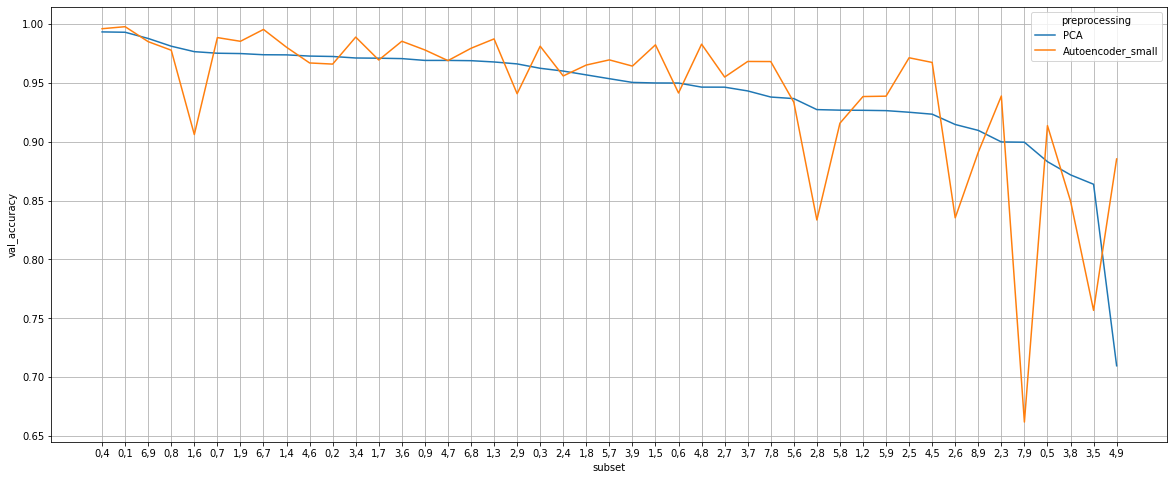

In [257]:
df = pd.DataFrame(l)
df = df[df.preprocessing.isin(["PCA","Autoencoder_small"])]
df = df.groupby(["preprocessing","system","subset"])["val_accuracy"].mean().reset_index()
df = df.sort_values(["preprocessing","val_accuracy"],ascending=False)

plt.figure(figsize=(20,8))
sns.lineplot(x="subset", y="val_accuracy", hue="preprocessing", data=df, hue_order=["PCA","Autoencoder_small"])
plt.grid()
plt.savefig("plots/neural_pca_vs_autoencoder", dpi=300, bbox_inches="tight")


In [258]:
df = df.pivot_table(index="subset",columns=["system","preprocessing"],values="val_accuracy")
df["diff"] = abs(df[("neuralnetwork","Autoencoder_small")]-df[("neuralnetwork","PCA")])


In [261]:
df.sort_values("diff",ascending=True).head(6)

system            neuralnetwork                diff
preprocessing Autoencoder_small       PCA          
subset                                             
4,7                    0.968823  0.968988  0.000166
1,7                    0.969333  0.970874  0.001541
6,9                    0.984918  0.987629  0.002711
0,4                    0.995923  0.993204  0.002718
5,6                    0.933514  0.936577  0.003063
0,8                    0.977653  0.981064  0.003412

In [216]:
l = list()



for preprocessing in os.listdir("measure/preprocessingvergleich"):
    for subset in os.listdir("measure/preprocessingvergleich/{}".format(preprocessing)):
        for round in os.listdir("measure/preprocessingvergleich/{}/{}".format(preprocessing,subset)):
            hist = json.load(open("measure/preprocessingvergleich/{}/{}/{}/hist.json".format(preprocessing,subset, round)))

            l.append({
                "system":"neuralnetwork",
                "preprocessing": preprocessing,
                "subset": subset,
                "round": round,
                "val_accuracy": hist["val_accuracy"][-1],
            })

for preprocessing in os.listdir("measure/qcircuit_loop"):
    for subset in os.listdir("measure/qcircuit_loop/{}".format(preprocessing)):
        hist = json.load(open("measure/qcircuit_loop/{}/{}/hist.json".format(preprocessing,subset)))
        l.append({
            "system":"qcircuit",
            "preprocessing": "qcircuit_{}".format(preprocessing),
            "subset": subset,
            "round": "0",
            "val_accuracy": hist["val_accuracy"][-1],
        })


# Autoencoder vs PCA

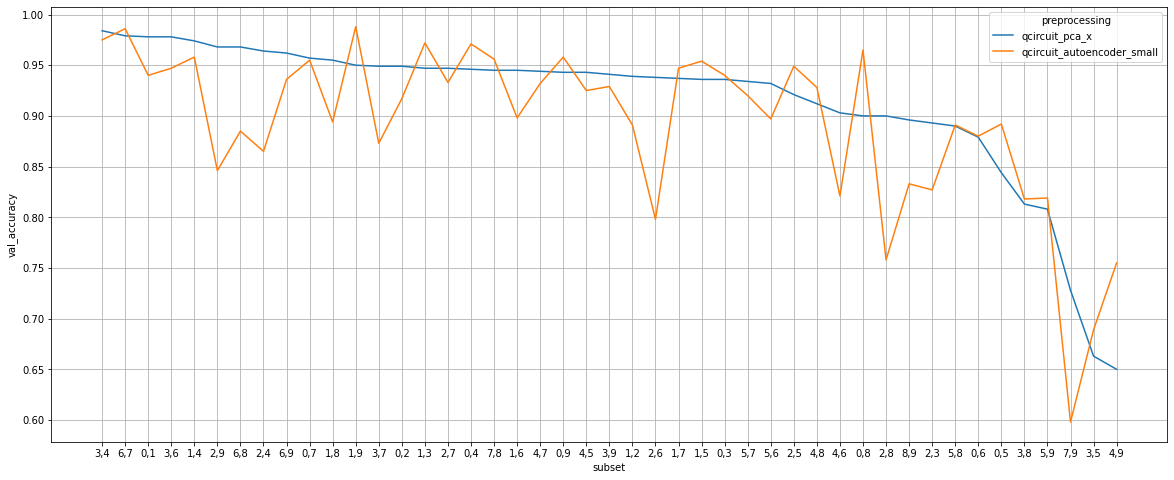

In [149]:
l = list()
for preprocessing in os.listdir("measure/qcircuit_loop"):
    for subset in os.listdir("measure/qcircuit_loop/{}".format(preprocessing)):
        hist = json.load(open("measure/qcircuit_loop/{}/{}/hist.json".format(preprocessing,subset)))
        l.append({
            "system":"qcircuit",
            "preprocessing": "qcircuit_{}".format(preprocessing),
            "subset": subset,
            "round": "0",
            "val_accuracy": hist["val_accuracy"][-1],
        })

df = pd.DataFrame(l)
df = df[df.preprocessing.isin(["qcircuit_pca_x","qcircuit_autoencoder_small"])]


df = df.sort_values(["preprocessing","val_accuracy"],ascending=False)
plt.figure(figsize=(20,8))
sns.lineplot(x="subset", y="val_accuracy", hue="preprocessing",hue_order=["qcircuit_pca_x","qcircuit_autoencoder_small"], data=df)
plt.grid()
plt.savefig("plots/pca_vs_autoencoder", dpi=300, bbox_inches="tight")


# Some Numbers dont work

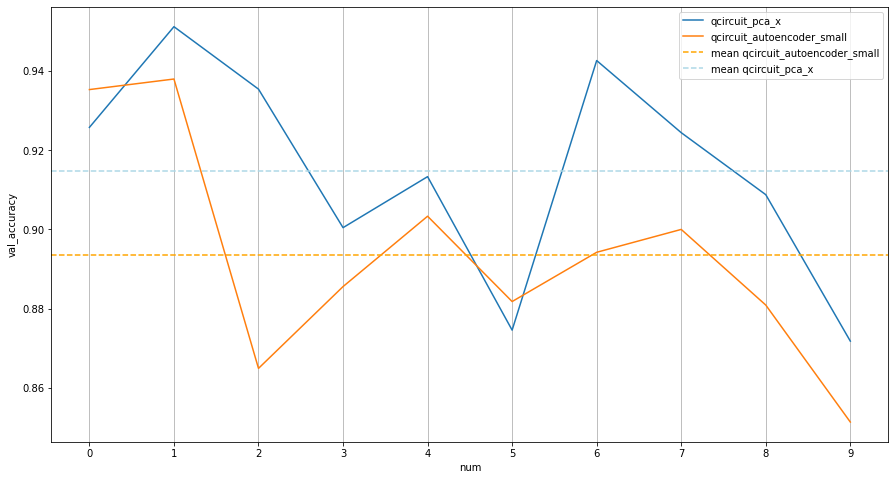

In [163]:
dfnum1 = df.copy()
dfnum1["num"] = df.subset.str.split(",").str[0]

dfnum2 = df.copy()
dfnum2["num"] = df.subset.str.split(",").str[1]

dfres = pd.concat([dfnum1,dfnum2]).groupby(["num","preprocessing"])["val_accuracy"].mean().reset_index().sort_values(["num"])

dfmeans = df.groupby(["preprocessing"])["val_accuracy"].mean()


plt.figure(figsize=(15,8))
sns.lineplot(x="num", y="val_accuracy",hue="preprocessing", hue_order=["qcircuit_pca_x","qcircuit_autoencoder_small"],data=dfres)
plt.axhline(y=dfmeans["qcircuit_autoencoder_small"], color="orange", linestyle="--",label="mean qcircuit_autoencoder_small")
plt.axhline(y=dfmeans["qcircuit_pca_x"], color="lightblue", linestyle="--", label="mean qcircuit_pca_x")

dfresauto = dfres[dfres.preprocessing=="qcircuit_autoencoder_small"]
dfrespca = dfres[dfres.preprocessing=="qcircuit_pca_x"]

plt.legend()
plt.grid(axis="x")
plt.savefig("plots/how_good_are_numbers.png", dpi=300, bbox_inches="tight")


In [88]:
df = pd.DataFrame(l)
df = df.groupby(["preprocessing","subset","system"])["val_accuracy"].mean().reset_index()
df = df.pivot_table(index="subset", columns="preprocessing", values="val_accuracy")
df["Autoencoder_diff"] = abs(df["Autoencoder_neu"] - df["qcircuit_autoencoder_x"])
df["PCA_diff"] = abs(df["PCA"] - df["qcircuit_pca"])
df = df[["Autoencoder_diff","PCA_diff","PCA","Autoencoder_neu","qcircuit_autoencoder_x","qcircuit_pca"]].reset_index()
df = df.sort_values(by="Autoencoder_diff", ascending=False)
df = df.melt(id_vars=["subset"], value_vars=["Autoencoder_diff","PCA_diff"])


plt.figure(figsize=(15,8))
sns.lineplot(x="subset", y="value", hue="preprocessing", data=df)

KeyError: 'Autoencoder_neu'

# Slide 6

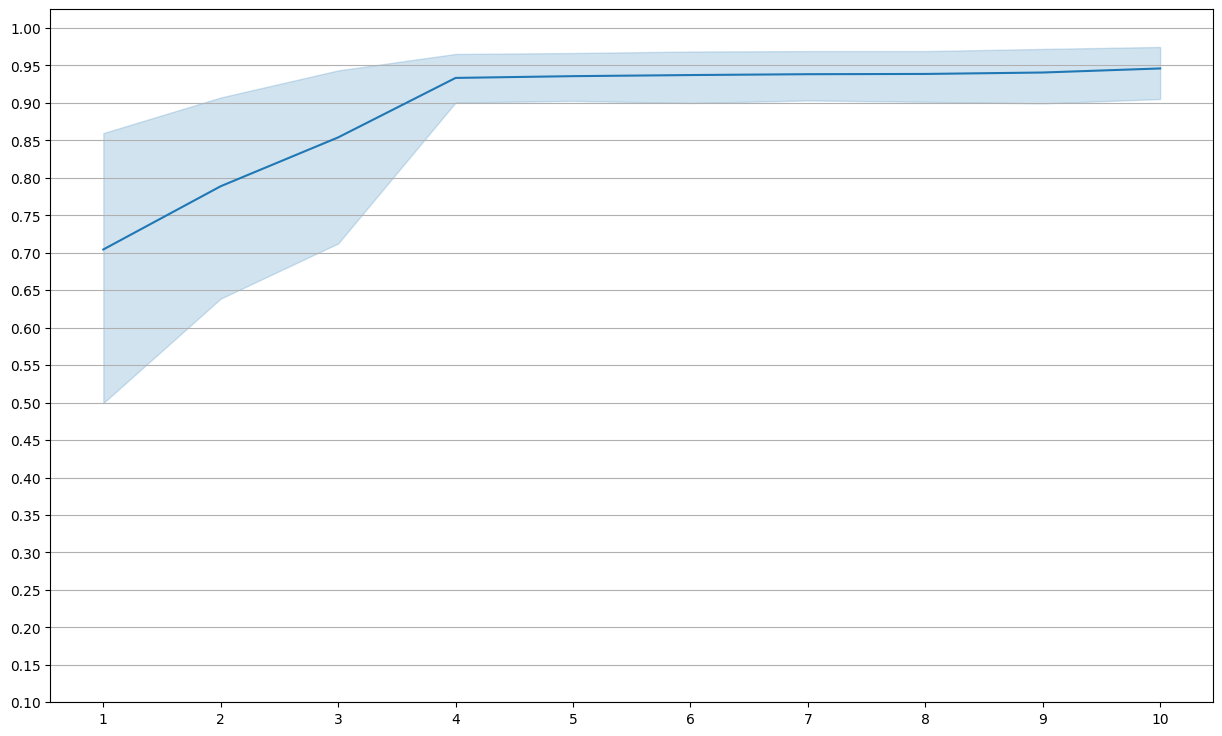

In [128]:
plt.figure(figsize=(15,9))
l =[]
for subset in os.listdir("measure/latentdimvergleich(7)_bigger/pca/latentdim=4"):
    hist = json.load(open("measure/latentdimvergleich(7)_bigger/pca/latentdim=4/"+subset+"/hist.json"))
    
    l.append({
        "subset":subset,
        "val_accuracy":hist["val_accuracy"],
        "epochs":np.arange(1,11)
    })



df = pd.DataFrame(l).explode(["epochs","val_accuracy"]).reset_index()



sns.lineplot(x="epochs", y="val_accuracy", data=df)
plt.ylim(0.1,1.025)
plt.yticks(np.arange(0.1, 1.05, 0.05))
plt.xticks(np.arange(1,11))
plt.grid(axis="y")
plt.xlabel(None)
plt.ylabel(None)
plt.savefig("plots/example_forsubset2.png", bbox_inches='tight', transparent=True)
plt.show()


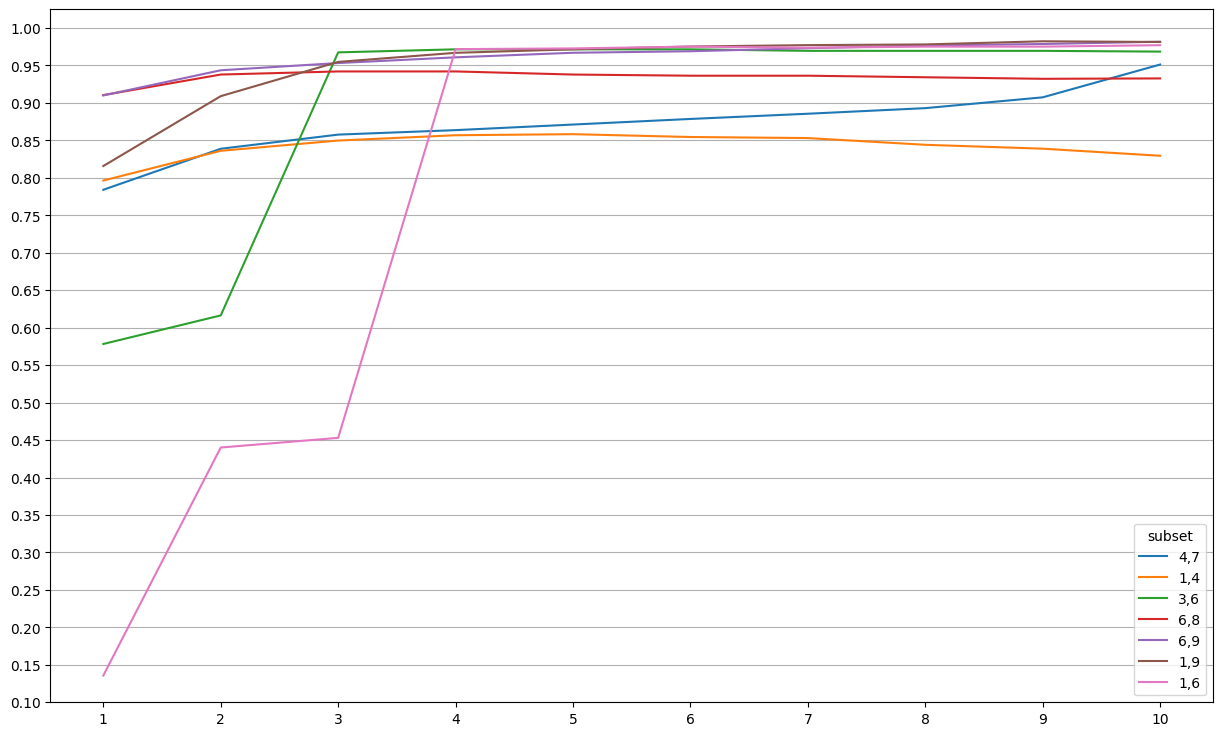

In [126]:

l =[]
for subset in os.listdir("measure/latentdimvergleich(7)_bigger/pca/latentdim=4"):
    hist = json.load(open("measure/latentdimvergleich(7)_bigger/pca/latentdim=4/"+subset+"/hist.json"))
    
    l.append({
        "subset":subset,
        "val_accuracy":hist["val_accuracy"],
        "epochs":np.arange(1,11)
    })



df = pd.DataFrame(l).explode(["epochs","val_accuracy"]).reset_index()


plt.figure(figsize=(15,9))
sns.lineplot(x="epochs", y="val_accuracy", data=df,hue="subset")
plt.ylim(0.1,1.025)
plt.yticks(np.arange(0.1, 1.05, 0.05))
plt.xticks(np.arange(1,11))
plt.grid(axis="y")
plt.xlabel(None)
plt.ylabel(None)
plt.savefig("plots/example_forsubset.png", bbox_inches='tight', transparent=True)
plt.show()


# Slide 11 - Perfomance of PCA on Neural - Network vs Quantum Ciruit

In [8]:
l = list()
for subset in os.listdir("measure/QCircuit/PCA"):
    for round in os.listdir("measure/QCircuit/PCA/"+subset):

        hist = json.load(open("measure/preprocessingvergleich/PCA/{}/{}/hist.json".format(subset,round)))

        histq = json.load(open("measure/QCircuit/PCA/{}/{}/hist.json".format(subset,round)))
        
        l.append({
            "system": "neural-network",
            "subset":subset,
            "round":round,
            "val_accuracy":hist["val_accuracy"],
            "epochs":np.arange(1,11)
        })

        l.append({
            "system": "quantum-circuit",
            "subset":subset,
            "round":round,
            "val_accuracy":histq["val_accuracy"],
            "epochs":np.arange(1,11)
        })

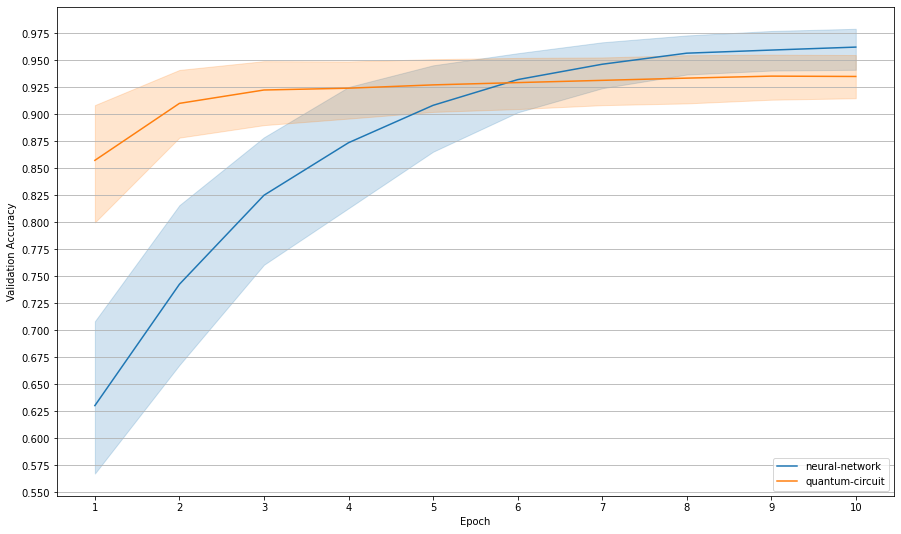

In [17]:
df = pd.DataFrame(l).explode(["epochs","val_accuracy"]).reset_index()
plt.figure(figsize=(15,9))
sns.lineplot(x="epochs", y="val_accuracy", data=df,hue="system")
plt.yticks(np.arange(0.55, 1, 0.025))
plt.xticks(np.arange(1,11))
plt.grid(axis="y")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend(loc=4)
plt.savefig("plots/pca_systemcomparison.png", bbox_inches='tight', transparent=True)
plt.show()


In [103]:
l = list()
for preprocessing in os.listdir("measure/preprocessingvergleich"):
    
    for subset in os.listdir("measure/preprocessingvergleich/{}".format(preprocessing)):
        
        for round in os.listdir("measure/preprocessingvergleich/{}/{}".format(preprocessing, subset)):

            hist = json.load(open("measure/preprocessingvergleich/{}/{}/{}/hist.json".format(preprocessing, subset, round)))

            d = {
                "preprocessing": preprocessing,
                "subset": subset,
                "round": round,
                "acc": hist["accuracy"][-1],
            }

            l.append(d)

df = pd.DataFrame(l)
df = df[df.preprocessing == "RAW"]
df.groupby("round").count()

,preprocessing,subset,acc
round,,,
0,45,45,45
1,45,45,45
2,45,45,45


In [246]:
df = pd.DataFrame(l)
df = df.groupby(["preprocessing", "subset"]).mean().reset_index()
df["acc"] = df["acc"].round(4)
df["rank"] = df.groupby(["preprocessing"])["acc"].rank(ascending=False)
df = df.pivot_table(index="subset", columns="preprocessing", values=["acc","rank"])

# diff in rank between autoencoder and pca
df[("rank","diff")] = np.abs(df[("rank","PCA")] - df[("rank","Autoencoder_6Epochs")])

df = df.sort_values(by=("rank","RAW"), ascending=True)
df

acc                                rank        \
preprocessing Autoencoder_6Epochs     PCA     RAW Autoencoder_6Epochs   PCA   
subset                                                                        
0,1                        0.8409  0.9898  0.9978                38.0   2.0   
6,7                        0.9893  0.9826  0.9969                 1.0   4.0   
1,6                        0.9821  0.9755  0.9963                 7.0   7.0   
6,9                        0.9804  0.9913  0.9954                 8.0   1.0   
1,4                        0.9887  0.9758  0.9946                 2.0   6.0   
0,7                        0.9735  0.9793  0.9942                11.0   5.0   
1,7                        0.9834  0.9706  0.9942                 5.0  10.0   
1,9                        0.9845  0.9690  0.9921                 3.0  12.0   
0,9                        0.9623  0.9720  0.9911                17.5   8.0   
3,6                        0.9795  0.9637  0.9909                 9.0  15.0   
3,4                        0.9736  0.9634  0.9908                10.0  16.0   
1,5                        0.9536  0.9401  0.9908                23.0  29.0   
0,4                        0.9829  0.9860  0.9905                 6.0   3.0   
1,3                        0.9839  0.9613  0.9899                 4.0  18.0   
5,7                        0.9580  0.9301  0.9886                20.0  32.0   
0,3                        0.9512  0.9514  0.9873                24.0  22.0   
0,8                        0.9623  0.9705  0.9868                17.5  11.0   
1,2                        0.9582  0.9423  0.9865                19.0  28.0   
4,8                        0.9658  0.9455  0.9853                13.0  25.0   
4,6                        0.8816  0.9707  0.9848                36.0   9.0   
6,8                        0.9654  0.9618  0.9843                14.0  17.0   
7,8                        0.9475  0.9468  0.9840                25.0  24.0   
2,9                        0.9539  0.9573  0.9832                22.0  19.0   
0,2                        0.9564  0.9659  0.9817                21.0  14.0   
4,7                        0.9275  0.9681  0.9811                28.0  13.0   
4,5                        0.9217  0.9189  0.9798                32.0  35.0   
0,6                        0.9271  0.9541  0.9795                29.0  21.0   
2,7                        0.9248  0.9500  0.9791                31.0  23.0   
3,7                        0.9653  0.9432  0.9788                15.0  26.5   
0,5                        0.9024  0.8767  0.9772                34.0  42.0   
5,9                        0.6923  0.9070  0.9763                41.0  40.0   
2,4                        0.9644  0.9553  0.9756                16.0  20.0   
2,6                        0.9416  0.9096  0.9741                27.0  39.0   
1,8                        0.9719  0.9365  0.9738                12.0  31.0   
2,5                        0.9253  0.9137  0.9719                30.0  38.0   
8,9                        0.8074  0.9158  0.9717                39.0  37.0   
3,9                        0.9473  0.9432  0.9708                26.0  26.5   
5,6                        0.9200  0.9383  0.9678                33.0  30.0   
2,3                        0.8783  0.9187  0.9628                37.0  36.0   
3,8                        0.7595  0.8631  0.9575                40.0  43.0   
2,8                        0.8964  0.9255  0.9568                35.0  33.0   
4,9                        0.5216  0.7021  0.9445                45.0  45.0   
5,8                        0.5979  0.9202  0.9434                44.0  34.0   
7,9                        0.6048  0.8798  0.9423                43.0  41.0   
3,5                        0.6824  0.8570  0.9381                42.0  44.0   

                           
preprocessing   RAW  diff  
subset                     
0,1             1.0  36.0  
6,7             2.0   3.0  
1,6             3.0   0.0  
6,9             4.0   7.0  
1,4             5.0   4.0  
0,7          

In [46]:
l = list()
for preprocessing in os.listdir("measure/preprocessingvergleich"):
    
    for subset in os.listdir("measure/preprocessingvergleich/{}".format(preprocessing)):
        
        for round in os.listdir("measure/preprocessingvergleich/{}/{}".format(preprocessing, subset)):

            hist = json.load(open("measure/preprocessingvergleich/{}/{}/{}/hist.json".format(preprocessing, subset, round)))

            d = {
                "preprocessing": preprocessing,
                "subset": subset,
                "round": round,
                "acc": hist["val_accuracy"],
                "epoch": np.arange(1,11)
            }

            l.append(d)

df = pd.DataFrame(l)
df_nn = df.explode(["acc","epoch"]).reset_index()

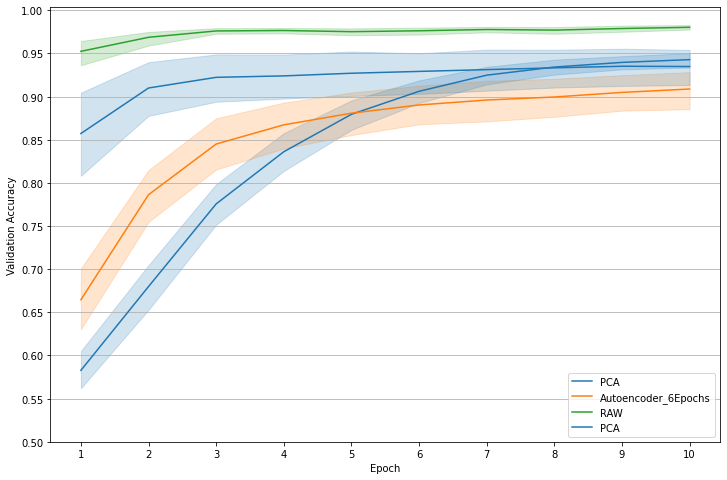

In [50]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_nn, x="epoch", y="acc", hue="preprocessing")
sns.lineplot(data=df, x="epochs", y="val_accuracy", hue="preprocessing")
plt.xticks(np.arange(1,11))
plt.yticks(np.arange(0.5,1.05,0.05))
plt.grid(axis="y")
plt.ylabel("Validation Accuracy")
plt.xlabel("Epoch")
plt.savefig("plots/preprocessingvergleich_accuracy.png")
#plot legend right bottom
plt.legend( loc=4)
plt.show()

In [48]:
d =list()
for preprocessing in os.listdir("measure/QCircuit"):
    
    for subset in os.listdir("measure/QCircuit/{}".format(preprocessing)):
        r = list()
        for round in os.listdir("measure/QCircuit/{}/{}".format(preprocessing,subset)):
            hist = json.load(open("measure/QCircuit/{}/{}/{}/hist.json".format(preprocessing,subset,round)))

            d.append({
                "subset":subset,
                "preprocessing":preprocessing,
                "round":round,
                "val_accuracy":hist["val_accuracy"],
                "epochs":np.arange(1,11)
            })
    
df = pd.DataFrame(d)

df = df.explode(["epochs","val_accuracy"]).reset_index()


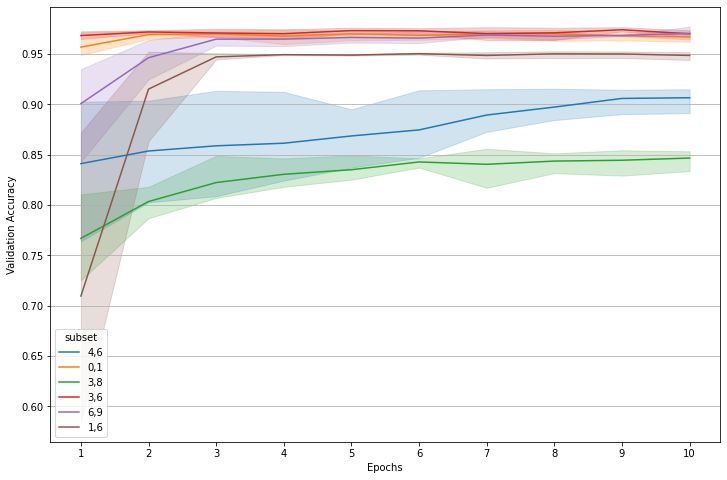

In [51]:





plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="epochs", y="val_accuracy", hue="subset")
plt.grid(axis="y")
plt.ylabel("Validation Accuracy")
plt.xticks(np.arange(1,11))
plt.xlabel("Epochs")
plt.show()

In [ ]:
df = df.explode(["val_accuracy","epochs"]).reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x="epochs",y="val_accuracy",hue="subset")
plt.legend(loc=4)
plt.xticks(np.arange(1,11))
plt.yticks(np.arange(0.575,1,0.025))
plt.grid(axis="y")
plt.title("Beudeutung der Rounds")
plt.show()

- man sieht dass manche Zahlenpaare vorallem in den früheren Epochen Schwanken -> aber in den höheren Epochen scheinen alle Rounds auf "ähnliche" ergebnisse zu kommen

# RAW

In [3]:
raw = Datasets.get_preprocessed_datasets("RAW")["RAW"]

# Wann schmiert acc ab?

In [4]:
featurenums = os.listdir("measure/featurecount_hidden/raw")
featurenums = [int(a) for a in featurenums]
featurenums.sort()

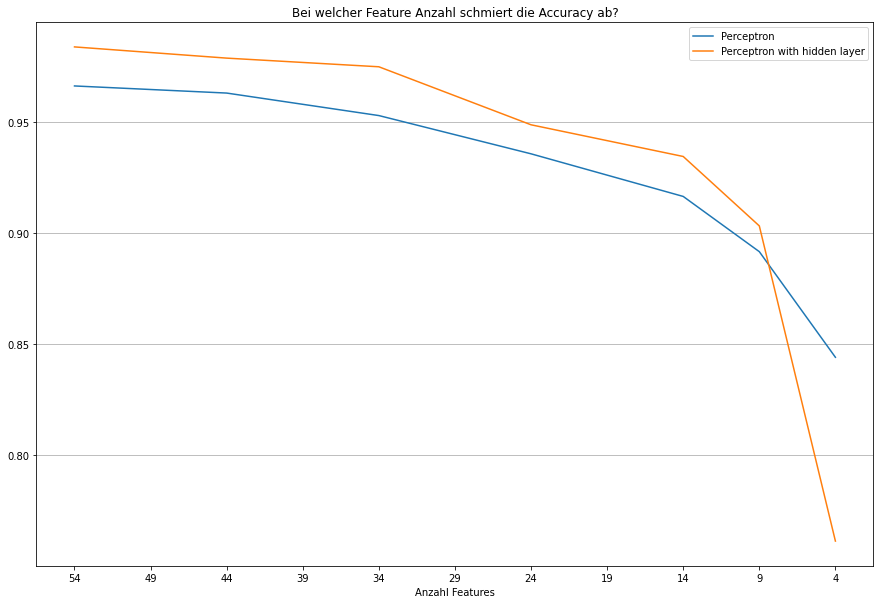

In [63]:
score = dict()
for hidden in ["featurecount", "featurecount_hidden"]:
    score[hidden] = dict()

    for featurenum in featurenums:
        meanlist = []
        for subset in os.listdir("measure/{}/raw/{}".format(hidden, featurenum)):
                with open("measure/{}/{}/{}/{}/hist.json".format(hidden, "raw",featurenum,subset), "r") as f:
                    meanlist.append(json.load(f)["val_accuracy"][-1])

        array = np.array(meanlist)
        score[hidden][featurenum] = array.mean(axis=0)

fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(score["featurecount"].keys(),score["featurecount"].values(),label="Perceptron")
ax.plot(score["featurecount_hidden"].keys(),score["featurecount_hidden"].values(),label="Perceptron with hidden layer")
ax.invert_xaxis()
ax.set_xticks(np.arange(4,55,5))
plt.grid(axis="y")
plt.title("Bei welcher Feature Anzahl schmiert die Accuracy ab?")
plt.xlabel("Anzahl Features")
plt.legend()
plt.savefig("plots/welche_feature_schmiert_ab_hidden.png")
plt.show()


# 4 vs 1

In [66]:
result = dict()
for type in os.listdir("measure/4vs1"):
    result[type] = dict()

    l = list()
    for subsetname in os.listdir("measure/4vs1/{}".format(type)):
        hist = json.load(open("measure/4vs1/{}/{}/hist.json".format(type,subsetname)))
        l.append(hist["val_accuracy"])

    arr = np.array(l)
    mean = arr.mean(axis=0)
    std = 1-arr.std(axis=0)

    result[type]["mean"] = mean
    result[type]["std"] = std

    

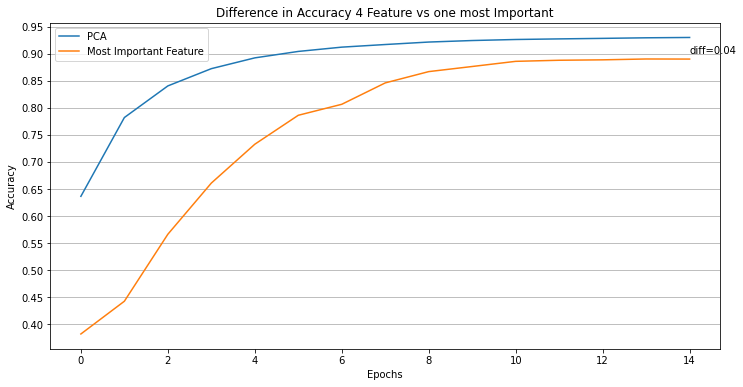

In [68]:
plt.figure(figsize=(12,6))
plt.plot(result["pca"]["mean"],label="PCA")
#plt.plot(result["pca"]["std"],label="PCA std")
plt.plot(result["one"]["mean"],label="Most Important Feature")
#plt.plot(result["one"]["std"],label="Most Important Feature std")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0.4,1,0.05))
plt.text(14,0.9,"diff={:.2f}".format(result["pca"]["mean"][-1]-result["one"]["mean"][-1]))
plt.grid(axis="y")
plt.title("Difference in Accuracy 4 Feature vs one most Important")
plt.savefig("plots/4vs1.png")
plt.show()



# Epochs Sweet Spot

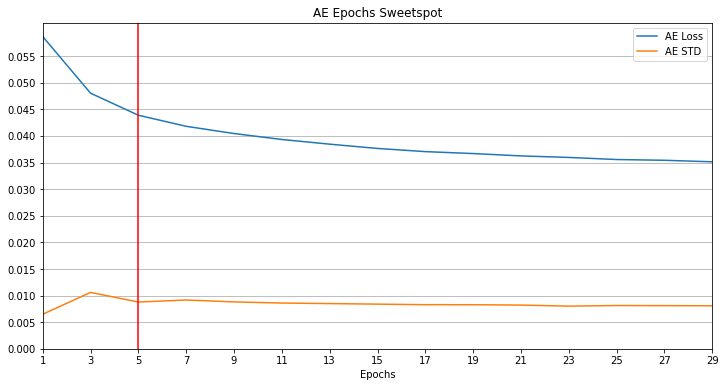

In [162]:
result = dict()
result["mean"] = dict()
result["std"] = dict()
for epochs_folder in sorted(os.listdir("data/ae_epochs"),key=lambda x: int(x.split("=")[-1])):


    epochs = int(epochs_folder.split("=")[1])
   

    l = list()

    for subsetname in os.listdir("data/ae_epochs/{}".format(epochs_folder)):
      
         hist = json.load(open("data/ae_epochs/{}/{}/hist.json".format(epochs_folder,subsetname)))
         l.append(hist["loss"][-1])

    arr = np.array(l)
    mean = arr.mean(axis=0)
    std = arr.std(axis=0)
    result["mean"][epochs] = mean
    result["std"][epochs]= std
    

plt.figure(figsize=(12,6))
plt.plot(result["mean"].keys(),result["mean"].values(),label="AE Loss")
plt.plot(result["std"].keys(),result["std"].values(),label="AE STD")
plt.xlim(1,29)
plt.xticks(list(result["mean"].keys()))
plt.yticks(np.arange(0,0.06,0.005))
plt.grid(axis="y")
plt.legend()
plt.xlabel("Epochs")
plt.savefig("plots/ae_epochs_sweetspot.png")
plt.title("AE Epochs Sweetspot")
plt.axvline(x=5,color="red")
plt.show()


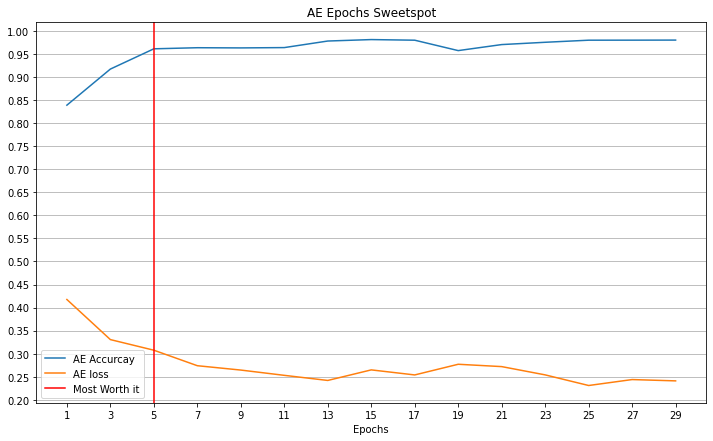

In [7]:
result = dict()
result["mean"] = dict()
result["std"] = dict()


result2 = dict()
result2["mean"] = dict()
result2["std"] = dict()

for epochs_folder in sorted(os.listdir("measure/ae_epochs"),key=lambda x: int(x.split("=")[-1])):


    epochs = int(epochs_folder.split("=")[1])
   

    l = list()
    l2 = list()

    for subsetname in os.listdir("measure/ae_epochs/{}".format(epochs_folder)):
      
        hist = json.load(open("measure/ae_epochs/{}/{}/hist.json".format(epochs_folder,subsetname)))
        l.append(hist["val_accuracy"][-1])
        l2.append(hist["loss"][-1])

    arr = np.array(l)
    mean = arr.mean(axis=0)
    std = 1-arr.std(axis=0)
    result["mean"][epochs] = mean
    result["std"][epochs]= std

    arr2 = np.array(l2)
    mean2 = arr2.mean(axis=0)
    std2 = 1-arr2.std(axis=0)
    result2["mean"][epochs] = mean2
    result2["std"][epochs]= std2
    

plt.figure(figsize=(12,7))
plt.plot(result["mean"].keys(),result["mean"].values(),label="AE Accurcay")
plt.plot(result2["mean"].keys(),result2["mean"].values(),label="AE loss")
plt.xticks(list(result["mean"].keys()))
plt.yticks(np.arange(0.2,1.05,0.05))
plt.grid(axis="y")

plt.xlabel("Epochs")
plt.savefig("plots/ae_epochs_sweetspot.png")
plt.title("AE Epochs Sweetspot")
plt.axvline(x=5,color="red",label="Most Worth it")
plt.legend()
plt.savefig("plots/ae_epochs_sweetspot.png")
plt.show()


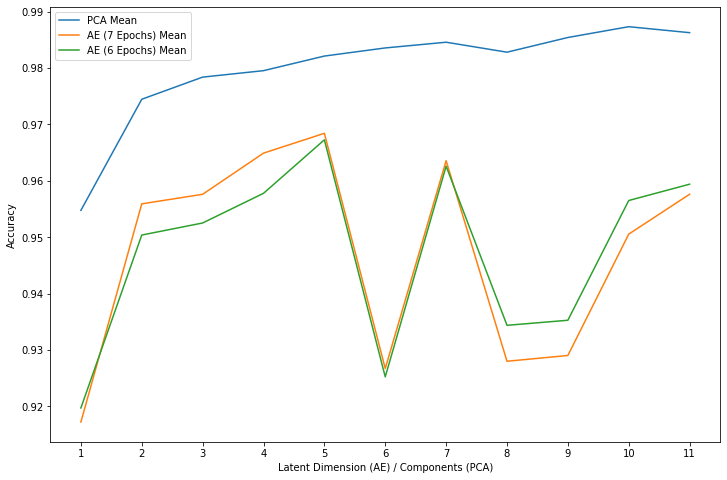

In [10]:
resultssmall = dict()
for preprocessing in os.listdir("measure/latentdimvergleich(7)"):
    resultssmall[preprocessing] = dict()
    resultssmall[preprocessing]["mean"] = dict()
    resultssmall[preprocessing]["std"] = dict()


    for latentdim in sorted(os.listdir("measure/latentdimvergleich(7)/{}".format(preprocessing)),key=lambda x: int(x.split("=")[-1])):
        latentdimnum = int(latentdim.split("=")[-1])


        l = list()
        for subset in os.listdir("measure/latentdimvergleich(7)/{}/{}".format(preprocessing,latentdim)):
         
            
            hist = json.load(open("measure/latentdimvergleich(7)/{}/{}/{}/hist.json".format(preprocessing,latentdim,subset)))
            l.append(hist["val_accuracy"][-1])

        arr = np.array(l)
        mean = arr.mean(axis=0)
        std = 1-arr.std(axis=0)
        resultssmall[preprocessing]["mean"][latentdimnum] = mean
        resultssmall[preprocessing]["std"][latentdimnum] = std



resultssmall["ae6"] = dict()
resultssmall["ae6"]["mean"] = dict()
resultssmall["ae6"]["std"] = dict()
for latentdim in sorted(os.listdir("measure/latentdimvergleich(6)/{}".format(preprocessing)),key=lambda x: int(x.split("=")[-1])):
        latentdimnum = int(latentdim.split("=")[-1])


        l = list()
        for subset in os.listdir("measure/latentdimvergleich(6)/{}/{}".format(preprocessing,latentdim)):
         
            
            hist = json.load(open("measure/latentdimvergleich(6)/{}/{}/{}/hist.json".format(preprocessing,latentdim,subset)))
            l.append(hist["val_accuracy"][-1])

        arr = np.array(l)
        mean = arr.mean(axis=0)
        std = 1-arr.std(axis=0)
        resultssmall["ae6"]["mean"][latentdimnum] = mean
        resultssmall["ae6"]["std"][latentdimnum] = std


plt.figure(figsize=(12,8))
plt.plot(resultssmall["pca"]["mean"].keys(),resultssmall["pca"]["mean"].values(),label="PCA Mean")
#plt.plot(resultssmall["pca"]["std"].keys(),resultssmall["pca"]["std"].values(),label="PCA STD")
plt.plot(resultssmall["ae"]["mean"].keys(),resultssmall["ae"]["mean"].values(),label="AE (7 Epochs) Mean")
plt.plot(resultssmall["ae6"]["mean"].keys(),resultssmall["ae6"]["mean"].values(),label="AE (6 Epochs) Mean")
plt.xticks(list(resultssmall["pca"]["mean"].keys()))
plt.xlabel("Latent Dimension (AE) / Components (PCA)")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("plots/latentdimvergleich_pca_ae")
plt.show()



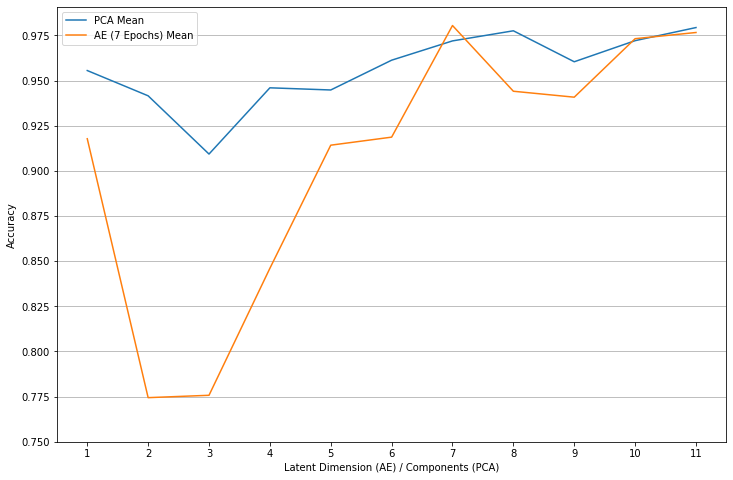

In [16]:
results = dict()
for preprocessing in os.listdir("measure/latentdimvergleich(7)_bigger"):
    results[preprocessing] = dict()
    results[preprocessing]["mean"] = dict()
    results[preprocessing]["std"] = dict()

    for latentdim in sorted(os.listdir("measure/latentdimvergleich(7)_bigger/{}".format(preprocessing)),key=lambda x: int(x.split("=")[-1])):
        latentdimnum = int(latentdim.split("=")[-1])

        l = list()
        for subset in os.listdir("measure/latentdimvergleich(7)_bigger/{}/{}".format(preprocessing,latentdim)):
            
            hist = json.load(open("measure/latentdimvergleich(7)_bigger/{}/{}/{}/hist.json".format(preprocessing,latentdim,subset)))
            l.append(hist["val_accuracy"][-1])

        arr = np.array(l)
        mean = arr.mean(axis=0)
        std = 1-arr.std(axis=0)
        results[preprocessing]["mean"][latentdimnum] = mean
        results[preprocessing]["std"][latentdimnum] = std


plt.figure(figsize=(12,8))
plt.plot(results["pca"]["mean"].keys(),results["pca"]["mean"].values(),label="PCA Mean")
#plt.plot(results["pca"]["std"].keys(),results["pca"]["std"].values(),label="PCA STD")
plt.plot(results["ae"]["mean"].keys(),results["ae"]["mean"].values(),label="AE (7 Epochs) Mean")
plt.xticks(list(results["pca"]["mean"].keys()))
plt.yticks(np.arange(0.75,1,0.025))
plt.grid(axis="y")
plt.ylabel("Accuracy")
plt.xlabel("Latent Dimension (AE) / Components (PCA)")
plt.legend()
plt.savefig("plots/latentdimvergleich_pca_ae_bigger")
plt.show()



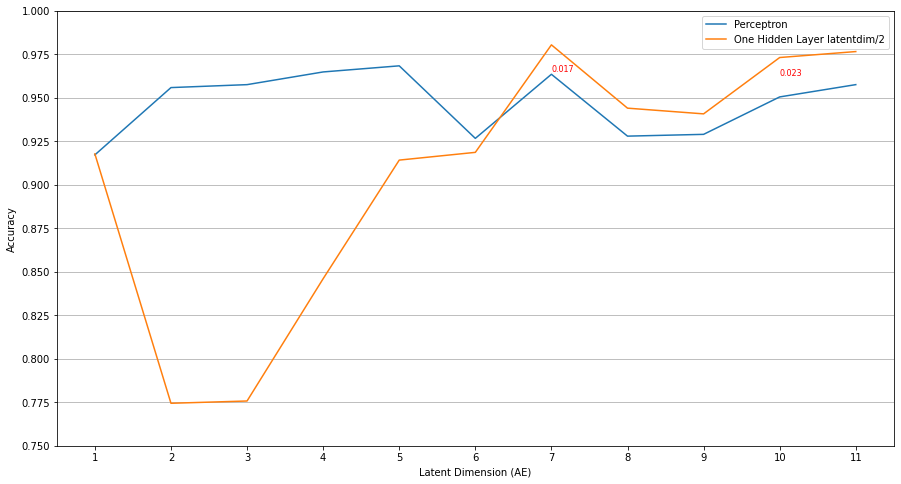

In [54]:
plt.figure(figsize=(15,8))
plt.plot(resultssmall["ae"]["mean"].keys(),resultssmall["ae"]["mean"].values(),label="Perceptron")
plt.plot(results["ae"]["mean"].keys(),results["ae"]["mean"].values(),label="One Hidden Layer latentdim/2")
plt.xticks(list(resultssmall["ae"]["mean"].keys()))
plt.yticks(np.arange(0.75,1.025,0.025))
plt.ylabel("Accuracy")
plt.xlabel("Latent Dimension (AE)")
plt.grid(axis="y")
plt.legend()
plt.text(x=7,y=0.965,s="{:.3f}".format(results["ae"]["mean"][7]-resultssmall["ae"]["mean"][7]),fontsize=8,color="red")
plt.text(x=10,y=0.9625,s="{:.3f}".format(results["ae"]["mean"][10]-resultssmall["ae"]["mean"][10]),fontsize=8,color="red")
plt.savefig("plots/latentdimvergleich_perceptron_vs_onehiddenlayer")
plt.show()
